## Project Title: Predicting Heart Disease Using Machine Learning

##Python (CRN: 73544)
##Group No: 7
## Team Members:
- Sandipkumar Prajapati
- Sushma Sri Paruchuri
- Amani Vuyyuru
- Dhanush Sai Ram Bezawada


In [1]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv('/content/heart.csv')

In [3]:
# Display basic information about the data
print("\nFirst few rows of the dataset:")
display(data.head())


First few rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [5]:
print("\nDataset Summary:")
print(data.describe())


Dataset Summary:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000

In [6]:
# ---- DATA CLEANING ----
# 1. Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# ---- EDA AND VISUALIZATION ----
# Check target distribution
print("\nTarget Distribution:")
print(data['target'].value_counts())


Target Distribution:
target
1    526
0    499
Name: count, dtype: int64


<ipython-input-8-7d812f4340fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


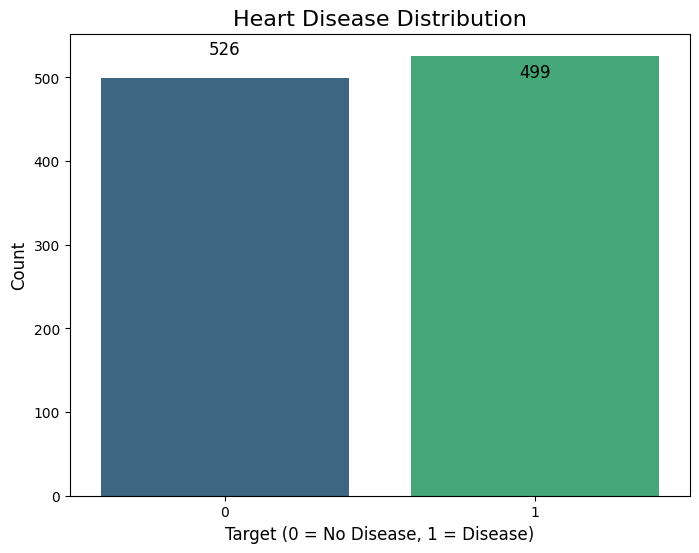

In [8]:
target_counts = data['target'].value_counts()

# Plot the bar graph with proper labels and bars
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title('Heart Disease Distribution', fontsize=16)
plt.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, count in enumerate(target_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)
# Show the plot
plt.show()



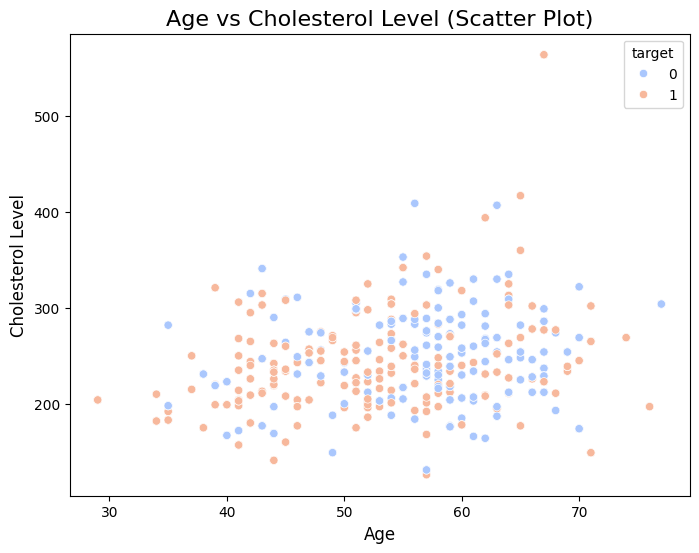

In [9]:
# 2. Scatter Plot: Relationship between age and cholesterol level (chol)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', data=data, hue='target', palette='coolwarm')
plt.title('Age vs Cholesterol Level (Scatter Plot)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol Level', fontsize=12)
plt.show()


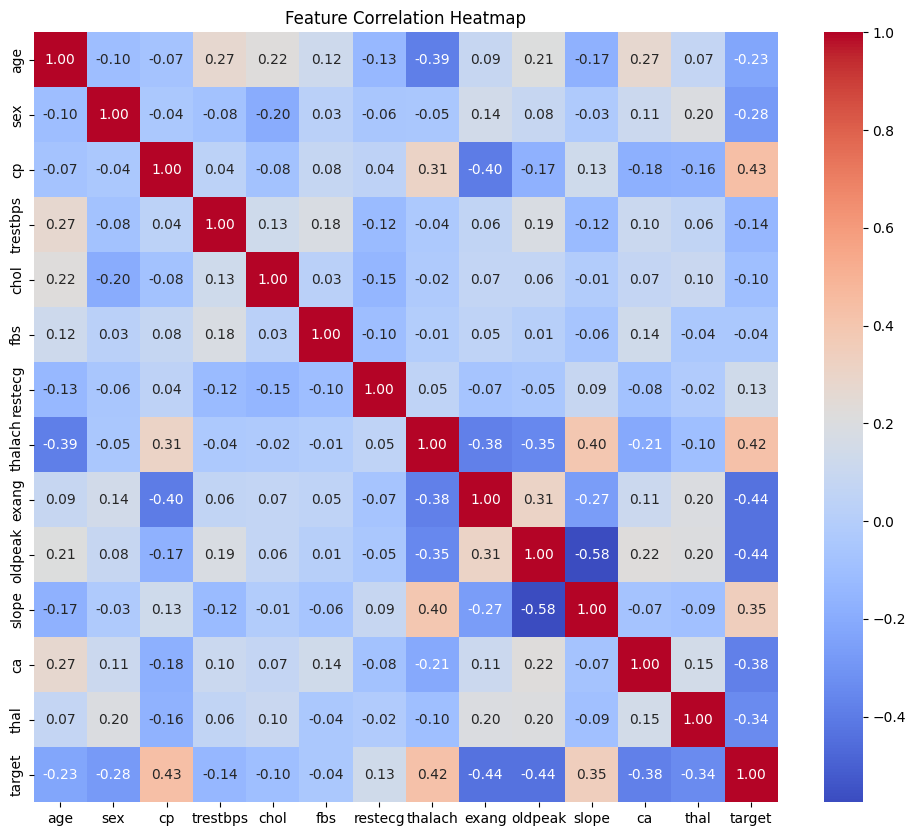

In [10]:

#  Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

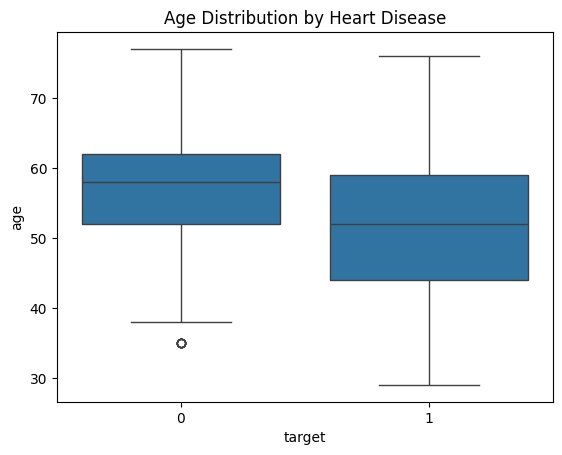

In [11]:
# 4. Boxplot: Age distribution by target
sns.boxplot(x='target', y='age', data=data)
plt.title('Age Distribution by Heart Disease')
plt.show()

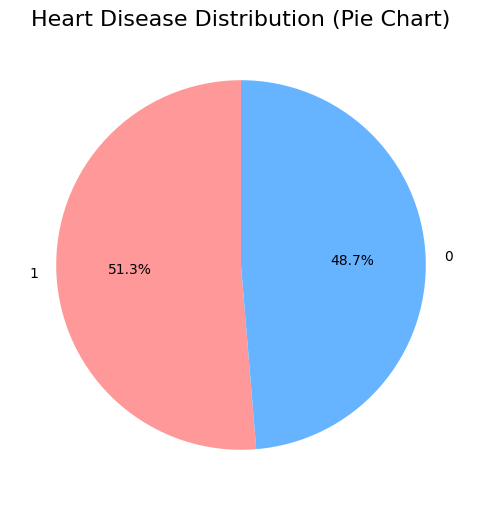

In [12]:
# 5. Pie Chart: Proportion of people with and without heart disease
plt.figure(figsize=(8, 6))
target_counts = data['target'].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Heart Disease Distribution (Pie Chart)', fontsize=16)
plt.show()

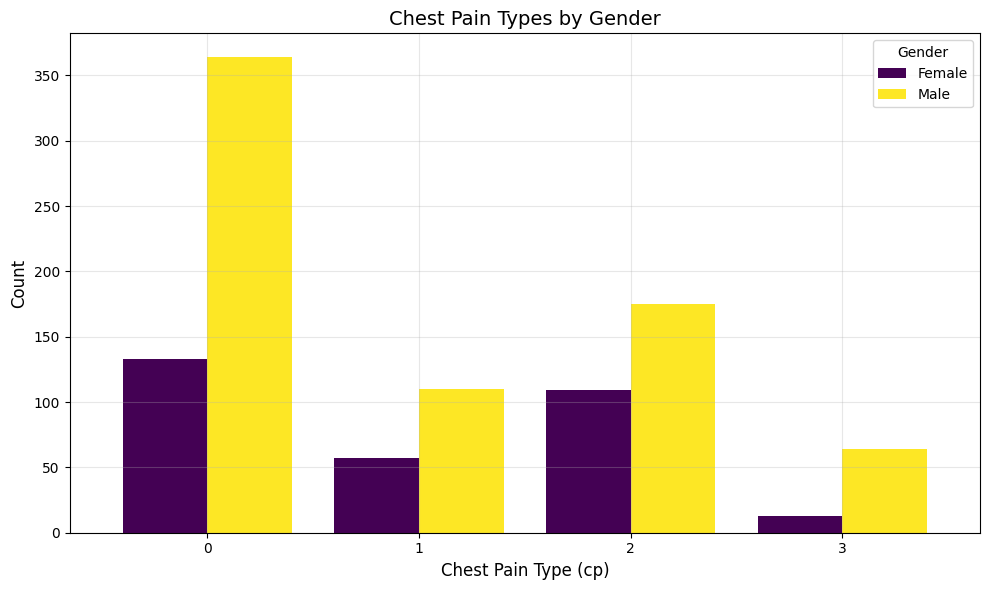

In [31]:

cp_gender_counts = data.groupby(['cp', 'sex']).size().unstack()

# Bar chart for chest pain type counts by gender
cp_gender_counts.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='viridis')
plt.title('Chest Pain Types by Gender', fontsize=14)
plt.xlabel('Chest Pain Type (cp)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'], title='Gender')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



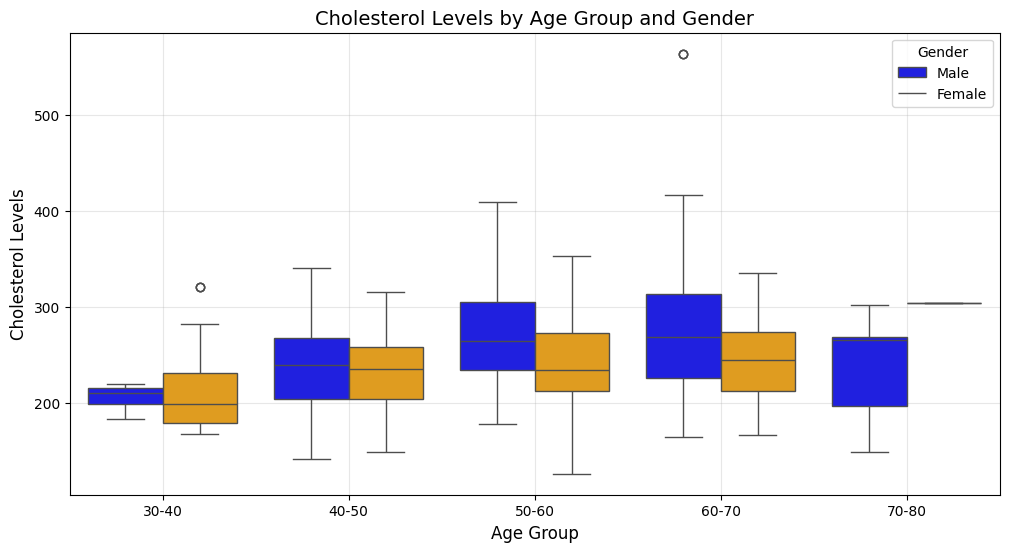

In [32]:
# Box plot: combining age, gender, and cholesterol levels
plt.figure(figsize=(12, 6))
data['age_group'] = pd.cut(data['age'], bins=[29, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])
sns.boxplot(x='age_group', y='chol', hue='sex', data=data, palette=['blue', 'orange'])
plt.title('Cholesterol Levels by Age Group and Gender', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Cholesterol Levels', fontsize=12)
plt.legend(title='Gender', labels=['Male', 'Female'], fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [13]:
# ---- FEATURE ENGINEERING ----
# Features (X) and target variable (y)
X = data.drop(columns=['target'])
y = data['target']

In [14]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# ---- MACHINE LEARNING MODELS ----
# Model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC AUC": roc_auc}

In [17]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_metrics = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [18]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_metrics = evaluate_model(dt_model, X_train, X_test, y_train, y_test)


In [19]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_metrics = evaluate_model(gb_model, X_train, X_test, y_train, y_test)

In [20]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_metrics = evaluate_model(rf_model, X_train, X_test, y_train, y_test)


In [21]:
# ---- MODEL PERFORMANCE COMPARISON ----
# Compare all models
models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
metrics = [lr_metrics, dt_metrics, gb_metrics, rf_metrics]

In [22]:
# Display metrics
for model_name, metric in zip(models, metrics):
    print(f"\n{model_name} Metrics:")
    for key, value in metric.items():
        print(f"  {key}: {value:.2f}")


Logistic Regression Metrics:
  Accuracy: 0.80
  Precision: 0.76
  Recall: 0.87
  F1 Score: 0.81
  ROC AUC: 0.79

Decision Tree Metrics:
  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.97
  F1 Score: 0.99
  ROC AUC: 0.99

Gradient Boosting Metrics:
  Accuracy: 0.93
  Precision: 0.92
  Recall: 0.95
  F1 Score: 0.93
  ROC AUC: 0.93

Random Forest Metrics:
  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.97
  F1 Score: 0.99
  ROC AUC: 0.99


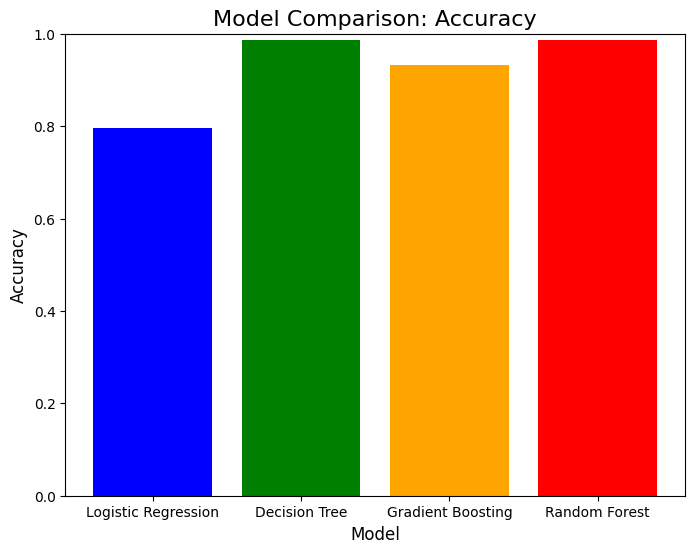

In [23]:
# Bar plot of Accuracy Scores
accuracies = [metric['Accuracy'] for metric in metrics]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.show()

In [24]:
# Best Model Selection
best_model = models[accuracies.index(max(accuracies))]
print(f"\nThe best-performing model is: {best_model} with Accuracy = {max(accuracies):.2f}")



The best-performing model is: Decision Tree with Accuracy = 0.99
